In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import datetime

In [2]:
DIR_rain_data = '../../Data/Rain gauges/'
URL_2020_rain = DIR_rain_data + 'clean2020data1475.csv'

DIR_data = 'C:/Users/sverrirhd/vedurgogn/'

<AxesSubplot:xlabel='TIMI'>

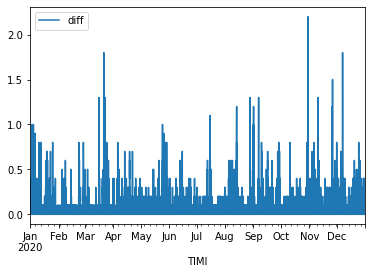

In [3]:
df_rain = pd.read_csv(URL_2020_rain,index_col=0)
df_rain.index = pd.DatetimeIndex(df_rain.index)
df_rain.plot()

In [4]:
def get_and_ravel_tensor(URL):
    tensor = np.load(URL)
    return tensor.reshape(-1,np.product(tensor.shape[1:]))

def get_dates(URL):
    dates = np.load(URL,allow_pickle=True)
    return dates

def get_missing(URL):
    missing_indexes = np.load(URL)
    return missing_indexes

def polar_plot(tensor,ax):
    rad_values = np.linspace(0,2*np.pi,420)
    theta_values = np.linspace(0,120,120)
    
    theta,rad = np.meshgrid(rad_values,theta_values)
    ax.pcolormesh(theta, rad, tensor.T, shading='auto')
    
    return ax
    
def plot_slice(tensor):
    f,axes = plt.subplots(2,4,figsize=(12,6),  subplot_kw={'projection': 'polar'})
    for slice_,ax in zip(tensor,axes.ravel()):
        polar_plot(slice_,ax)
    plt.tight_layout()
    plt.show()
        

In [5]:

URL_tensors = glob(DIR_data + '??.npy')
URL_dates = glob(DIR_data + '??_file_dates.npy')
URL_missing_indexes = glob(DIR_data + '??_missing_indexes.npy')

In [6]:

month_lengths = [8918,8327,8922,8523,8880,8632,8916,8928,8606,8840,8603,8872]
n_radar = np.sum(month_lengths)

In [7]:
tensor = np.zeros((int(n_radar),403200),dtype='int8')
x_dict = {}
y_dict = {}
for i in range(0,12):
    print(i)
    month_tensor = get_and_ravel_tensor(URL_tensors[i])
    month_dates = get_dates(URL_dates[i])
    month_missing = get_missing(URL_missing_indexes[i])

    # Create X and Y to use for comparison
    month_include = np.delete(np.arange(len(month_dates)),month_missing )
    
    y = df_rain.loc[month_dates[month_include]].values
    start = np.sum(month_lengths[:i])
    end   = np.sum(month_lengths[:i+1])
    tensor[int(start):int(end)] = month_tensor
    
    # tensor_list.append(month_tensor)
    x_dict[i] = {'dates':month_dates,'missing':month_missing}
    y_dict[i] = y

y = np.concatenate([y_dict[i] for i in y_dict])

0
1
2
3
4
5
6
7
8
9
10
11


In [9]:
all_dates = np.concatenate([x_dict[i]['dates'] for i in x_dict])
all_missing = np.concatenate([x_dict[i]['missing'] for i in x_dict])
dates = np.delete(all_dates,all_missing)

In [10]:
radar_time_series = pd.Series(tensor[:,59660],index = dates)

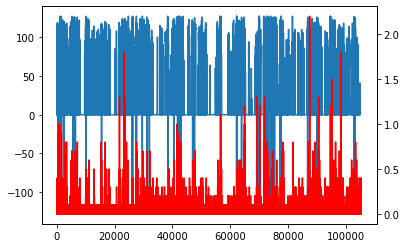

In [11]:
plt.plot(tensor[:,59660])
plt.gca().twinx().plot(df_rain.values,color='red')


In [12]:
URL_drainage_data = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Drainage data/'
URL_2020_file = URL_drainage_data + '2020.csv'

In [13]:
df_20 = pd.read_csv(URL_2020_file)
df_20.CTime = pd.to_datetime(df_20.CTime)
df_20 = df_20[df_20.Flag == 0]

In [14]:
y_pivot = pd.pivot_table(df_20,values='Val',index='CTime',columns='Name')
y_pivot

Name,F-RVK-BOD-RS111,F-RVK-FAX-RS901,F-RVK-ING-RS111,F-RVK-SEI-RS111,F-RVK-VES-RS111
CTime,,,,,
2020-01-01 01:00:00,55.491951,1333.390828,292.917216,75.000000,108.063296
2020-01-01 02:00:00,51.679479,1325.244629,292.360046,75.000000,106.207452
2020-01-01 03:00:00,51.292734,1319.756388,288.957611,75.000000,0.000000
2020-01-01 04:00:00,52.625085,1297.999634,284.572337,75.000000,120.546631
2020-01-01 05:00:00,50.316443,1157.736694,277.502268,75.000000,85.294765
...,...,...,...,...,...
2020-12-31 19:00:00,62.624752,1258.484060,277.490160,65.583112,116.649272
2020-12-31 20:00:00,59.760759,929.793411,341.181838,62.889711,113.125483
2020-12-31 21:00:00,56.047441,1052.262221,343.928302,63.700439,103.947603


2020-01-01 00:00:00     0
2020-01-01 00:05:00     0
2020-01-01 00:10:00    64
2020-01-01 00:15:00     0
2020-01-01 00:20:00    96
                       ..
2020-12-31 23:35:00     0
2020-12-31 23:40:00     0
2020-12-31 23:45:00     0
2020-12-31 23:50:00     0
2020-12-31 23:55:00     0
Length: 104967, dtype: int8

In [36]:
# y_pivot.loc[:,'F-RVK-FAX-RS901'],df_rain.groupby(pd.Grouper(freq='1H')).sum(),radar_time_series.groupby(pd.Grouper(freq='1H')).sum()

In [41]:
drainage_rain_gauage = pd.concat([y_pivot.loc[:,'F-RVK-FAX-RS901'],
                                  df_rain.groupby(pd.Grouper(freq='1H')).sum(),
                                  radar_time_series.groupby(pd.Grouper(freq='1H')).sum()],axis=1)
drainage_rain_gauage.columns = ['drainage','rain_gauge','radar']

In [42]:
drainage_rain_gauage

,drainage,rain_gauge,radar
2020-01-01 00:00:00,NaN,0.40,483.0
2020-01-01 01:00:00,1333.390828,0.20,262.0
2020-01-01 02:00:00,1325.244629,0.80,195.0
2020-01-01 03:00:00,1319.756388,0.40,192.0
2020-01-01 04:00:00,1297.999634,0.20,100.0
...,...,...,...
2020-12-31 19:00:00,1258.484060,0.25,0.0
2020-12-31 20:00:00,929.793411,0.15,0.0
2020-12-31 21:00:00,1052.262221,0.00,0.0
2020-12-31 22:00:00,1036.527609,0.00,0.0


In [43]:
drainage_rain_gauage = drainage_rain_gauage.dropna()

NameError: name 'drainage_rain_gauage' is not defined

In [82]:
rain_season_start = '2020-05-01 05:00:00'
rain_season_end = '2020-10-01 05:00:00'
drg_subset1 = drainage_rain_gauage.loc[rain_season_start:rain_season_end]
drg_subset2 = pd.concat([drainage_rain_gauage.loc[:rain_season_start],drainage_rain_gauage.loc[rain_season_end:]])

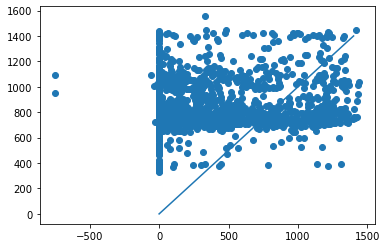

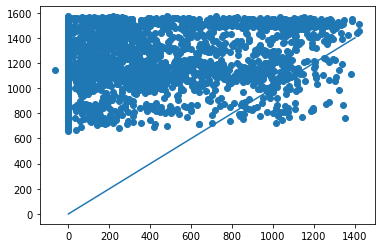

In [83]:
plt.scatter(drg_subset1.radar,drg_subset1.drainage)
plt.plot([0,1400],[0,1400])
plt.figure()
plt.scatter(drg_subset2.radar,drg_subset2.drainage)
plt.plot([0,1400],[0,1400])

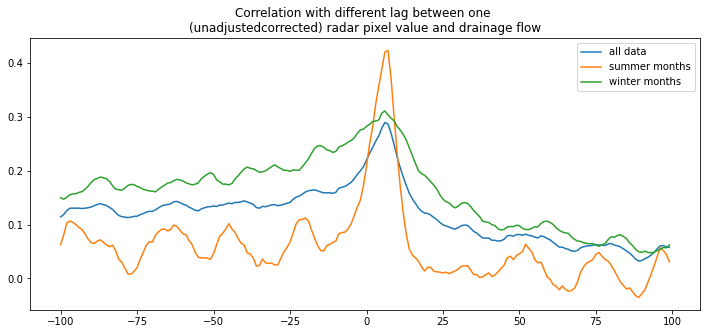

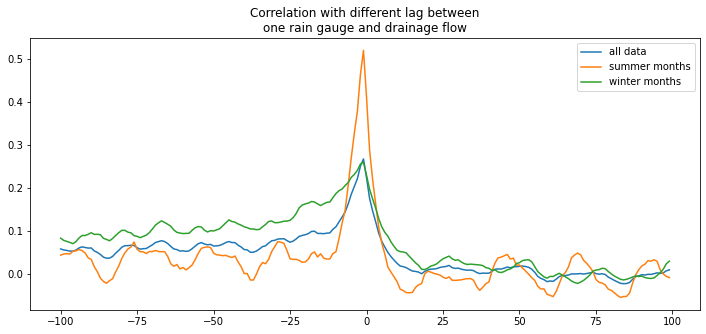

In [100]:
corr_xy = lambda x,y: np.corrcoef(x.dropna(),y.dropna())[0,1]
corr_shift = lambda x,y,s : corr_xy(x.shift(s),y.shift(-s))


shifts = range(-100,100)


corrs1 = []
corrs2 = []
corrs3 = []
for shift in shifts:
    corr1=corr_shift(drainage_rain_gauage.drainage,drainage_rain_gauage.radar,shift)
    corr2=corr_shift(drg_subset1.drainage,drg_subset1.radar,shift)
    corr3=corr_shift(drg_subset2.drainage,drg_subset2.radar,shift)
    corrs1.append(corr1)
    corrs2.append(corr2)
    corrs3.append(corr3)

plt.figure(figsize=(12,5))
plt.plot(shifts,corrs1,label='all data')
plt.plot(shifts,corrs2,label='summer months')
plt.plot(shifts,corrs3,label='winter months')

plt.title('Correlation with different lag between one \n(unadjustedcorrected) radar pixel value and drainage flow')
plt.legend()
plt.show()


################


plt.figure(figsize=(12,5))
corr_xy = lambda x,y: np.corrcoef(x.dropna(),y.dropna())[0,1]
corr_shift = lambda x,y,s : corr_xy(x.shift(s),y.shift(-s))


shifts = range(-100,100)

corrs1 = []
corrs2 = []
corrs3 = []
for shift in shifts:
    corr1=corr_shift(drainage_rain_gauage.drainage,drainage_rain_gauage.rain_gauge,shift)
    corr2=corr_shift(drg_subset1.drainage,drg_subset1.rain_gauge,shift)
    corr3=corr_shift(drg_subset2.drainage,drg_subset2.rain_gauge,shift)
    corrs1.append(corr1)
    corrs2.append(corr2)
    corrs3.append(corr3)
plt.plot(shifts,corrs1,label='all data')
plt.plot(shifts,corrs2,label='summer months')
plt.plot(shifts,corrs3,label='winter months')

plt.title('Correlation with different lag between\none rain gauge and drainage flow')
plt.legend()
plt.show()

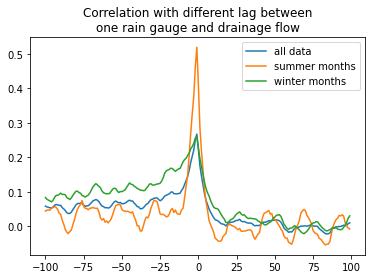

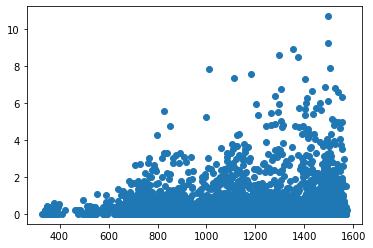

In [40]:
plt.scatter(drainage_rain_gauage.loc[:,'F-RVK-FAX-RS901'],drainage_rain_gauage.loc[:,'diff'])

<AxesSubplot:xlabel='CTime'>

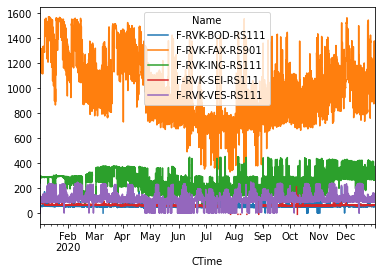

In [11]:
y_pivot.plot()